<a href="https://colab.research.google.com/github/iampro3/opencv2/blob/main/0720_cv2_contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


# Contour error
- 출처 : https://pekahblog.tistory.com/8
- cv2.findContours를 처리하는 줄에서 에러가 발생하였다.
-ValueError: not enough values to unpack (expected 3, got 2)
다음의 에러 문구를 출력하였는데,
-OpenCV 3.4.3 이하 버전에서는 코드를 달리 작성해야 하는 것 같다.
-예제를 보고
: _, contours, _ = cv2.findContours(…)와 같이 작성하였는데,
- 변경된 코드 : contours, _ = cv2.findContours(…)

In [ ]:
import cv2
from skimage.data import horse
import numpy as np
import matplotlib.pyplot as plt



img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

#images, contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
#images, contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [ ]:
len(contours)

2

In [ ]:
contours[0].shape

(312, 1, 2)

In [ ]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

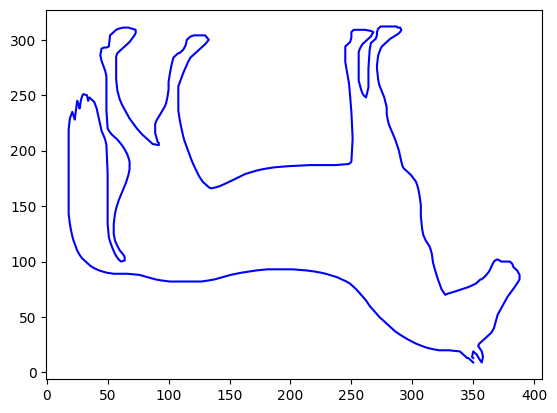

In [ ]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

In [ ]:
array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

NameError: ignored

<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  plt.tight_layout()
<ipython-input-14-1e4759f054d0>:12: UserWarning: Glyph 506

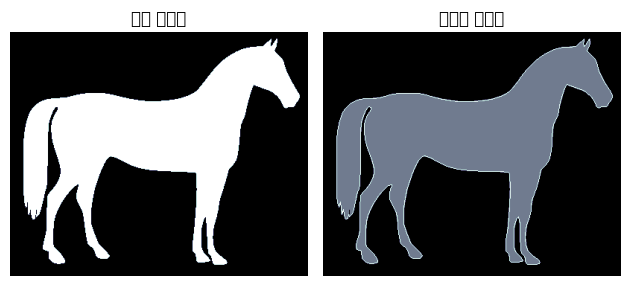

In [ ]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [ ]:
cv2.contourArea(c0)

42355.0

In [ ]:
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False)

(2203.678272008896, 2199.678272008896)

In [ ]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

(18, 9, 371, 304)

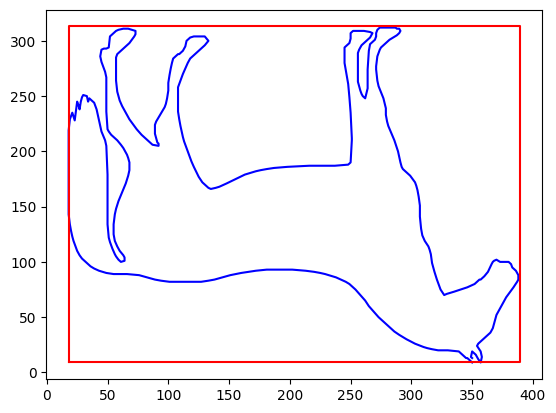

In [ ]:
plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x],
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

In [ ]:
aspect_ratio = float(w) / h
aspect_ratio

1.2203947368421053

In [ ]:
aspect_ratio = float(w) / h
aspect_ratio

1.2203947368421053

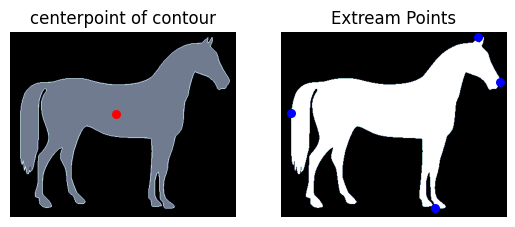

In [ ]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("centerpoint of contour")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]],
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]],
    c="b", s=30)
plt.title("Extream Points")

plt.show()

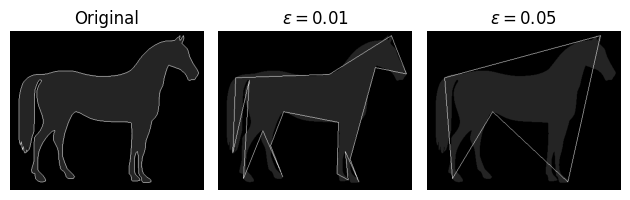

In [ ]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')
img3 = img_raw.copy().astype('uint8')

c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)
epsilon2 = 0.05*cv2.arcLength(c0, True)

approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)

image1 = cv2.drawContours(img1, [c0], -1, 7)  #
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)

titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
cv2.isContourConvex(c0)

False

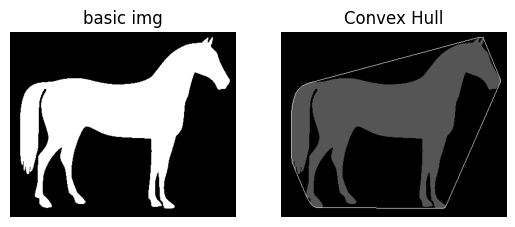

In [ ]:
img4 = img_raw.copy().astype('uint8')

c0 = contours[0]
hull = cv2.convexHull(c0)
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['basic img', 'Convex Hull']
images = [img_raw, img4]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], 'gray')
    plt.axis('off')

plt.show()

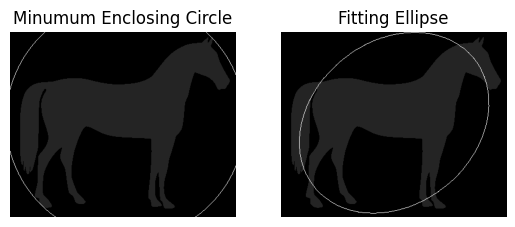

In [ ]:
img3 = img_raw.copy().astype("uint8")
img4 = img_raw.copy().astype("uint8")

(x, y), radius = cv2.minEnclosingCircle(c0)
center = int(x), int(y)
radius = int(radius)
img3 = cv2.circle(img3, center, radius, 7)

ellipse = cv2.fitEllipse(c0)
img4 = cv2.ellipse(img4, ellipse, 7)


plt.subplot(1,2,1)
plt.imshow(img3, cmap="gray")
plt.axis('off')
plt.title("Minumum Enclosing Circle")
plt.subplot(1,2,2)
plt.imshow(img4, cmap="gray")
plt.axis('off')
plt.title("Fitting Ellipse")
plt.show()